<a href="https://colab.research.google.com/github/alwaysneedhelp/Practice-for-IOAI/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import kagglehub
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [435]:
path = kagglehub.dataset_download('yasserh/housing-prices-dataset')
path = os.path.join(path, 'Housing.csv')
data = pd.read_csv(path)

In [436]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [437]:
data['mainroad'] = (data['mainroad']=='yes').astype(int)
data['guestroom'] = (data['guestroom']=='yes').astype(int)
data['hotwaterheating'] = (data['hotwaterheating']=='yes').astype(int)
data['airconditioning'] = (data['airconditioning']=='yes').astype(int)
data['prefarea'] = (data['prefarea']=='yes').astype(int)
data['basement'] = (data['basement']=='yes').astype(int)


In [438]:
data['funishingstatus_furnished'] = (data['furnishingstatus']=='furnished')
data['funishingstatus_semi_furnished'] = (data['furnishingstatus']=='semi-furnished').astype(int)
data['funishingstatus_unfurnished'] = (data['furnishingstatus']=='unfurnished')

In [439]:
data.drop('furnishingstatus', inplace=True, axis=1)

ADDITIONAL DATA

In [440]:
data['luxury_score'] = (
    data['airconditioning'] +
    data['hotwaterheating'] +
    data['guestroom'] +
    data['funishingstatus_furnished'] * 2 +
    data['parking']
)
data['area_per_room'] = data['area'] / (data['bedrooms'] + data['bathrooms'] + 1e-5 + data['guestroom'])
data['preferences'] = data['airconditioning']+data['hotwaterheating']+data['funishingstatus_furnished'] + data['parking']
data['location'] =  data['mainroad'] + data['prefarea']

In [441]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,funishingstatus_furnished,funishingstatus_semi_furnished,funishingstatus_unfurnished,luxury_score,area_per_room,preferences,location
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,0,False,5,1236.664606,4,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,0,False,6,1119.998600,5,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,1,False,2,1991.996016,2,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,0,False,6,1249.997917,5,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,0,False,6,1236.664606,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,0,True,2,999.996667,2,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,1,False,0,599.998500,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,0,True,0,1206.662644,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,0,False,2,727.498181,1,0


<Axes: >

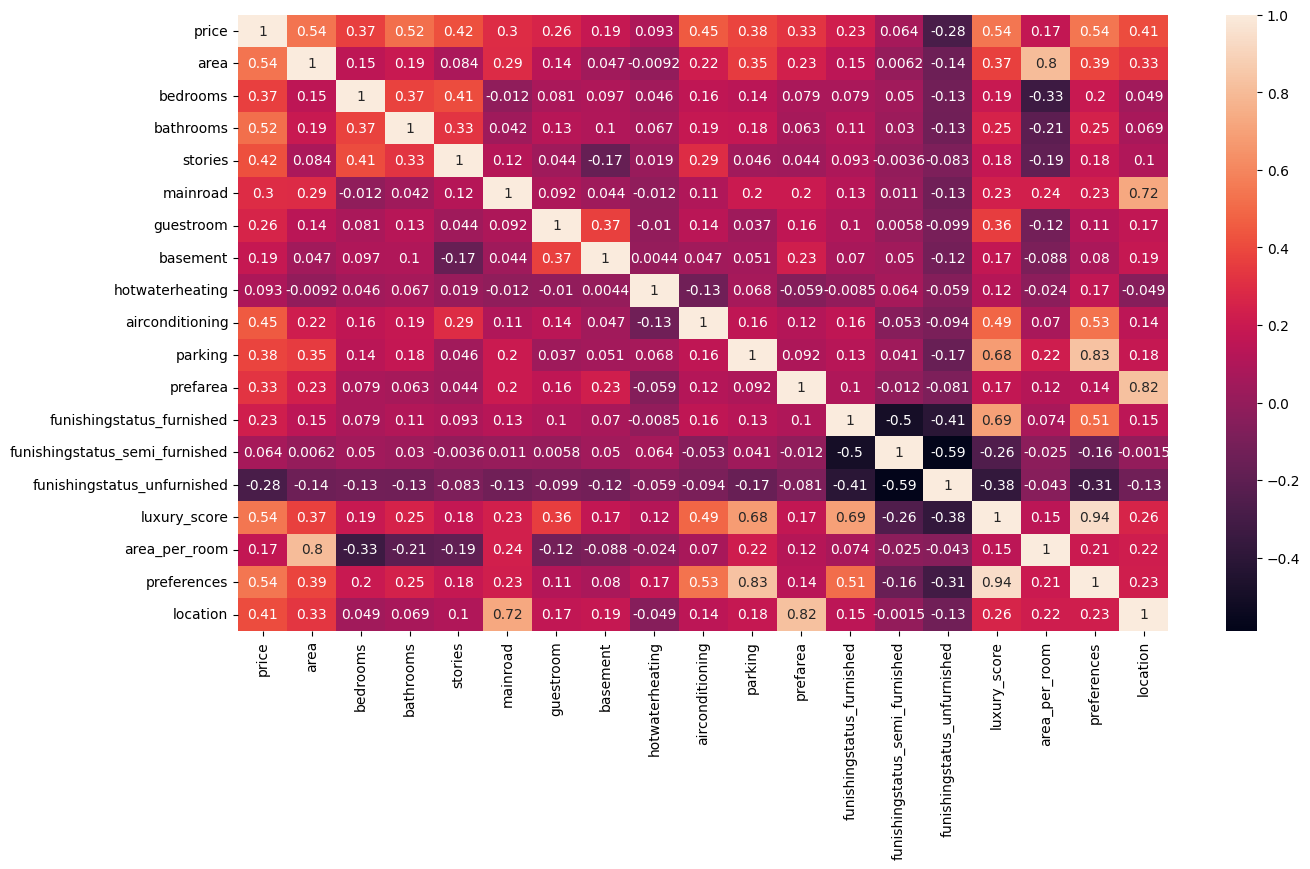

In [442]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

In [443]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,funishingstatus_furnished,funishingstatus_semi_furnished,funishingstatus_unfurnished,luxury_score,area_per_room,preferences,location
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,0,False,5,1236.664606,4,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,0,False,6,1119.998600,5,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,1,False,2,1991.996016,2,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,0,False,6,1249.997917,5,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,0,False,6,1236.664606,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,0,True,2,999.996667,2,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,1,False,0,599.998500,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,0,True,0,1206.662644,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,0,False,2,727.498181,1,0


In [444]:
forest = RandomForestRegressor()

In [445]:
x_train, x_test = train_test_split(data, train_size=0.8, shuffle=True)

In [446]:
x_train, y_train = x_train.drop('price', axis=1), x_train['price']
x_test, y_test = x_test.drop('price', axis=1), x_test['price']

In [447]:
scaler = StandardScaler()
x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)

In [448]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [449]:
forest.score(x_test, y_test)

0.645747691985314

In [450]:
param_grid = {
    'n_estimators' : [30,50,100],
    'max_features' : [2,3,4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, return_train_score=True)

In [451]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True)

In [452]:
grid_search.best_estimator_.score(x_test, y_test)

0.7001470634940095

# LOW ACCURACY BECAUSE OF SMALL DATASET IG